# Sampling in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<hr>

## Chapter 1: Introduction to Sampling

### Sampling and point estimates

- Working with a subset of the whole population is called **sampling**
- The population is the complete dataset
- Typically, we don't know what the whole population is 
- The sample is the subset of data you calculate on

In [13]:
coffee = pd.read_feather("databases/coffee_ratings_full.feather")
coffee[["total_cup_points", "variety", "country_of_origin", "aroma", "flavor", "aftertaste", "body", "balance"]].head()

,total_cup_points,variety,country_of_origin,aroma,flavor,aftertaste,body,balance
0,90.58,None,Ethiopia,8.67,8.83,8.67,8.50,8.42
1,89.92,Other,Ethiopia,8.75,8.67,8.50,8.42,8.42
2,89.75,Bourbon,Guatemala,8.42,8.50,8.42,8.33,8.42
3,89.00,None,Ethiopia,8.17,8.58,8.42,8.50,8.25
4,88.83,Other,Ethiopia,8.25,8.50,8.25,8.42,8.33


Points vs. flavor: population

In [21]:
pts_vs_flavor_pop = coffee[["total_cup_points", "flavor"]].sample(n=10) #returns 10 random rows
pts_vs_flavor_pop

,total_cup_points,flavor
1082,80.42,7.08
780,82.08,7.25
837,81.83,7.50
749,82.25,7.33
1085,80.42,7.08
165,84.50,7.83
301,83.75,7.67
1161,79.67,7.25
547,82.92,7.83
1124,80.00,7.75


`.sample()` method works for both pandas DataFrames and Series

In [19]:
cup_points_samp = coffee["total_cup_points"].sample(n=10)
cup_points_samp

811     82.00
1198    79.00
1062    80.58
246     84.00
30      86.58
560     82.83
1134    79.92
583     82.75
174     84.42
1242    78.00
Name: total_cup_points, dtype: float64

A *population parameter* is a calculation made on the population dataset

In [26]:
np.mean(pts_vs_flavor_pop["total_cup_points"])

81.784

A *point estimate* or *sample statistic* is a calculation made on the sample dataset

In [22]:
np.mean(cup_points_samp)

82.00800000000001

**Point estimates with pandas**

In [25]:
print(pts_vs_flavor_pop["total_cup_points"].mean())
print(cup_points_samp.mean())

81.784
82.00800000000001


Task 1

In [30]:
spotify_population = pd.read_feather("databases/spotify_2000_2020.feather")

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.8921634333333333


Task 2

In [31]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.74969


### Convenience sampling

- Collecting data by the easiest method is called - convenience sampling
- It often leads to sample being not representative, causing sample bias

In [32]:
coffee_ratings_first10 = coffee.head(10)
coffee_ratings_first10["total_cup_points"].mean()

#Convenience sample is not representative, the actual mean is around 82

89.1

**Visualizing selection bias**

*Population:*

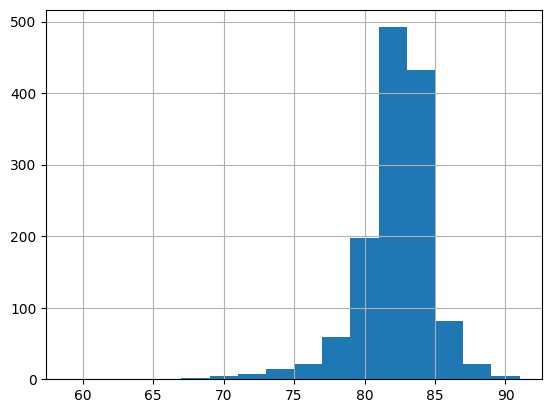

In [33]:
coffee["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

*The same code for convenience sample:*

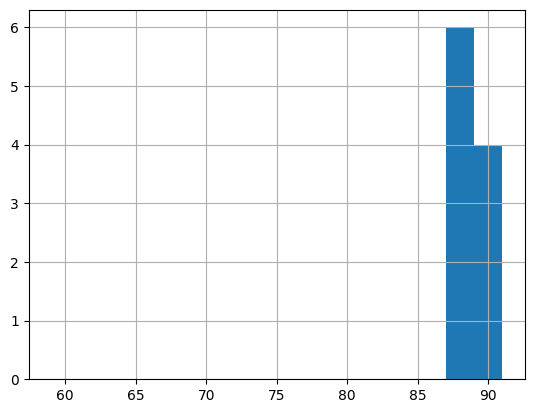

In [34]:
coffee_ratings_first10["total_cup_points"].hist(bins=np.arange(59, 93, 2))
plt.show()

Comparing two histograms it is clear that the distribution of a sample value is not the same as the sample plot

*Visualizing seelcction bias for a random selection:*

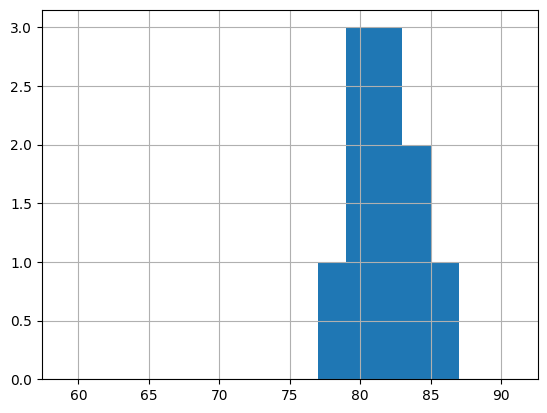

In [36]:
cup_points_samp.hist(bins=np.arange(59, 93, 2))
plt.show()

The shape of the distribution is closer to the actual population when random sampling is used

### Pseudo-random number generation

- appears to be random, but actually next "random" number is calculated from previous "random" number
- the first "random" number calculated from a seed
- The same seed value yields the same random numbers

Visualizing "random" numbers

In [37]:
randoms = np.random.beta(a=2, b=2, size=5000)
randoms

#size - how many numbers to generate

array([0.57716901, 0.16391923, 0.58169851, ..., 0.47082744, 0.28434413,
       0.24829481])

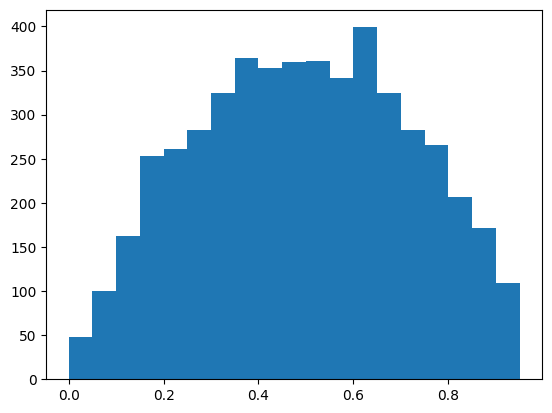

In [38]:
plt.hist(randoms, bins = np.arange(0, 1, 0.05))
plt.show()

In [41]:
np.random.seed(200000229)

In [40]:
np.random.normal(loc=2, scale=1.5, size=2)

#loc - mean
#scale - std

array([2.69861022, 5.48501273])

<hr>

## Chapter 2: Sampling Methods

### Simple random and systematic sampling

- **Simple random sampling** is similar to a lottery (we take some coffee variety one at a time - each coffee has the same chance as any other to be picked)

In [42]:
coffee.sample(n=5, random_state=19000113) #seed for reproducibility

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


- **Systematic sampling** samples the population at regular intervals (for example - every fifth coffee is samples)

In [46]:
sample_size = 5
pop_size = len(coffee)

interval = pop_size/sample_size
print(interval)

#However, interval must be an int, therefore we will compute integer division
#We use //

interval = pop_size // sample_size
print(interval)

267.6
267


In the example above we have seen that to get a systematic sample of five coffees on our population, we will select every 267 coffee in the dataset

To perform this operation:

In [47]:
coffee.loc[::267]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


**The trouble with systematic sampling**

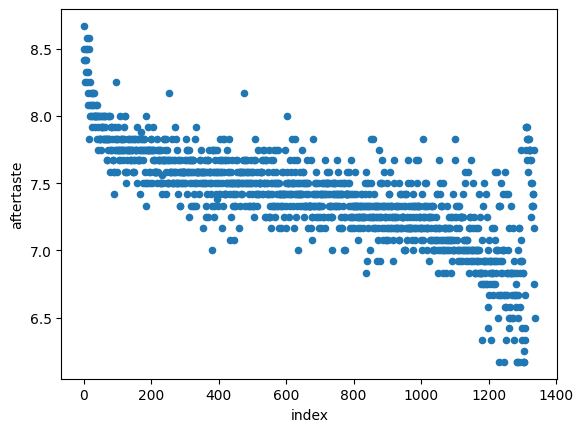

In [48]:
coffee = coffee.reset_index()
coffee.plot(x="index", y="aftertaste", kind="scatter")
plt.show()

It is only save to use systematical sampling when we don't have pattern like this, where there is clearly a bias

**Making sure systematic sampling safe**

[]

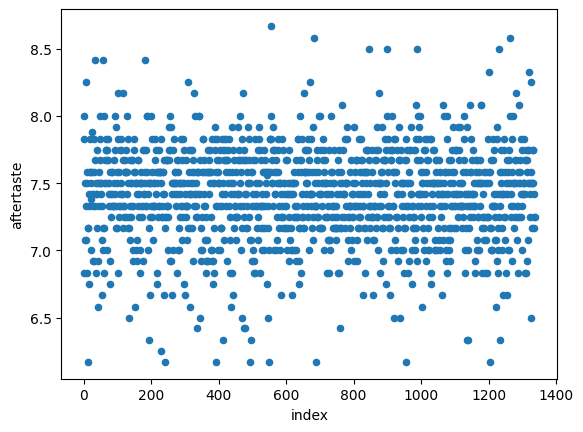

In [50]:
coffee = pd.read_feather("databases/coffee_ratings_full.feather")
#frac returns new dataframe with rows shuffles
shuffled = coffee.sample(frac=1) 

#Because of the shuffle indexes got mixed up in order, so we first set a proper order from to n-1 (setting True to delete previous values)
#Then we reset index one more time to use it as column
shuffled = shuffled.reset_index(drop=True).reset_index()

shuffled.plot(x="index", y="aftertaste", kind="scatter")
plt.plot()

Now thanks to the shuffle there is no such pattern as before

Notice that once we have shuffled the rows, systematic approach is basically the same as simple random sampling

### Stratified and weighted random sampling

In [53]:
top_counted_countries = ['Mexico', 'Colombia', 'Guatemala',
                         'Brazil', 'Taiwan', 'United States (Hawaii)']

top_counted_susbset = coffee['country_of_origin'].isin(top_counted_countries)

coffee_ratings_top = coffee[top_counted_susbset]

Description: The frac parameter specifies the fraction of rows to be returned from the DataFrame. It should be a float between 0 and 1, inclusive.

However these random rows are returned in random order or in other words are shuffled

In the cell below we have taken a 10% sample of our population and compared it with the distribution of the whole population

In [55]:
coffee_ratings_samp = coffee_ratings_top.sample(frac=0.1, random_state=2021)
coffee_ratings_samp['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

In [58]:
coffee_ratings_top['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: proportion, dtype: float64

**Proportional stratified sampling**

In [59]:
coffee_rating_strat = coffee_ratings_top.groupby("country_of_origin")\
    .sample(frac=0.1, random_state=2021)

Calling the dot-sample method after grouping takes a simple random sample within each country

In [61]:
coffee_rating_strat['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

Now the results seem to be much closer to the actual distribution

**Equal counts stratified sampling**

In [62]:
coffee_ratings_eq = coffee_ratings_top.groupby("country_of_origin")\
    .sample(n=15, random_state=2021)

coffee_ratings_eq['country_of_origin'].value_counts(normalize=True)

country_of_origin
Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: proportion, dtype: float64

We got equal proportions as we have randomly chosen 15 examples of each country

**Weighted random sampling**

Specify weights to adjust the relative probability of a row being sampled

In [75]:
coffee_ratings_weight = coffee_ratings_top.copy()
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"

#coffees made in Taiwan have two times the chance of being picked compared to other coffees
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)

coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights="weight")

In [76]:
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

country_of_origin
Colombia                  0.215909
Brazil                    0.204545
Guatemala                 0.181818
Mexico                    0.181818
Taiwan                    0.170455
United States (Hawaii)    0.045455
Name: proportion, dtype: float64

***Stratified sampling is useful if you care about subgroups. Otherwise, simple random sampling is more appropriate.***

Task 1 - to better get the idea of weights

In [ ]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight.hist("YearsAtCompany", bins=np.arange(0, 41, 1))
plt.show()

### Cluster Sampling

One problem with stratified sampling is that we have to collect data from every subgroup

**Stratified sampling:**
- split the population into subgroups
- use simple random sampling on every subgroup

**Cluster sampling:**
- use simple random sampling to pick some subgroups
- use simple random sampling ononly those subgroups

In [79]:
varieties_pop = list(coffee["variety"].unique())

Step 1: sampling for subgroups

In [82]:
import random 

varieties_samp = random.sample(varieties_pop, k=3)
varieties_samp

['Ethiopian Heirlooms', 'Sulawesi', 'Bourbon']

Step 2: sampling each group

In [ ]:
variety_condition = coffee['variety'].isin(varieties_samp)
coffee_ratings_cluster = coffee[variety_condition]

coffee_ratings_cluster["variety"] = coffee_ratings_cluster["variety"].cat.remove_unused_categories()

coffee_ratings_cluster.groupby("variety")\
    .sample(n=5, random_state=2021)

### Comparing Sampling Methods

<hr>

## Chapter 3: Sampling Distributions

<hr>

## Chapter 4: Bootstrap Distributions